In [1]:
%load_ext autoreload
%autoreload 2

import torch
import time
import IPython.display as IPd
from svgutils.compose import *
import subprocess

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import sys
sys.path.append('../code')

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
from matplotlib.cm import ScalarMappable

from fslm.experiment_helper import SimpleDB
from fslm4expdata.analysis import plot_agg_fts_searches_im, plot_agg_fts_searches_bar, plot_ft_search_results
from fslm4expdata.hh_simulator import HHSimulator
from fslm4expdata.utils import get_Vt_o
from fslm4expdata.utils import import_tree_data

In [6]:
sorted_kls = pd.read_csv("path2archived_experiments_and_data/results/xo_sweep" + "/nle_v_npe_kls.csv")
top50_xo = sorted_kls["x_o"].loc[:49]

xo_name = top50_xo[25]
# xo_name = top50_xo[2]
# xo_name = "20190624_sample_3"
# tree_db = SimpleDB(f"../results/fslm_tree_3k_top50_{xo_name}", "r")
tree_db = SimpleDB(f"path2archived_experiments_and_data/results/fslm_tree_top50_2k_{xo_name}", "r")
data_db = SimpleDB("path2experiments_and_data/data", "r")

X_o = data_db.query("X_o")
Xo_names = list(X_o.keys())
root_dir = "path2raw_data"
t_o, Vt_o = get_Vt_o(xo_name, root_dir)
ft_labels = HHSimulator().features()

Bad value in file '.mpl_rc', line 17 ('mathtext.fontset     : Arial, sans-serif'): Key mathtext.fontset: 'Arial, sans-serif' is not a valid value for mathtext.fontset; supported values are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']


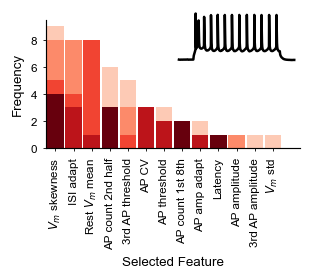

In [7]:
with mpl.rc_context(fname=".mpl_rc"):
    fig, ax = plt.subplots(1, 1, figsize=(2.7,2.5))
    # fig, axes_set = plt.subplots(len(observations),1 + len(ft_sets), figsize=(8,8), sharex="col")

    batch = []
    for seed in range(10):
        tree_data = import_tree_data(f"{tree_db.location}/best_mcmc_{seed}_nan2c_best_fts.txt")
        batch.append(tree_data)
    ax, im = plot_agg_fts_searches_bar(batch, ax=ax, sort_by="freq")
    ax.set_yticks(range(0,10,2))
    # fig.suptitle("Feature importance according to tree-search.")

    inset_ax = ax.inset_axes([0.5, 0.67, 0.5, 0.4])

    
    inset_ax.plot(t_o, Vt_o, c="k")
    inset_ax.axis('off')

plt.tight_layout()
plt.savefig("fig2_panel_a.svg")
plt.show()

Bad value in file '.mpl_rc', line 17 ('mathtext.fontset     : Arial, sans-serif'): Key mathtext.fontset: 'Arial, sans-serif' is not a valid value for mathtext.fontset; supported values are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']
WARNING    /home/jnsbck/Uni/PhD/projects/fslm4expdata/fslm/figures/../code/sbi_feature_importance/experiment_helper.py:231: UserWarning: Existing database opened in write mode.                     Risk to existing files. Consider opening it as read only.
  warnings.warn("Existing database opened in write mode. \
 [py.warnings]


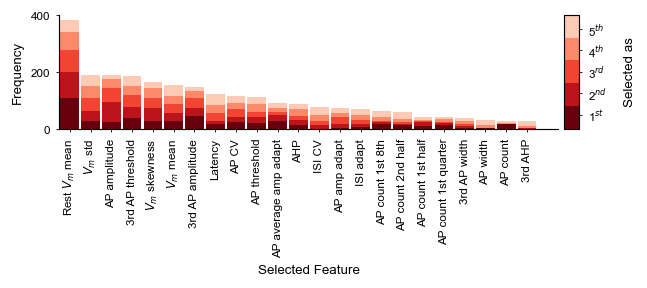

In [9]:
with mpl.rc_context(fname=".mpl_rc"):
    fig, ax = plt.subplots(1, 1, figsize=(5.5,2.5))
    # fig, axes_set = plt.subplots(len(observations),1 + len(ft_sets), figsize=(8,8), sharex="col")

    batch = []
    for xo_name in top50_xo:
        xo_tree_db = SimpleDB(f"path2archived_experiments_and_data/results/fslm_tree_top50_2k_{xo_name}")
        for seed in range(10):
            tree_data = import_tree_data(f"{xo_tree_db.location}/best_mcmc_{seed}_nan2c_best_fts.txt")
            batch.append(tree_data)
    ax, im = plot_agg_fts_searches_bar(batch, ax=ax, sort_by="freq", add_cbar=True)
    # ax.hlines(500, -0.5, 22.5, colors="k", lw=0.5, ls="--")
    # ax.set_yticks([100, 300, 500])

plt.tight_layout()
plt.savefig("fig2_panel_b.svg")
plt.show()

In [10]:
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}

f = Figure("20.3cm", "6.3cm",           
Panel(
        SVG("fig2_panel_a.svg").scale(svg_scale),
        Text("a", -5, 2.0, **kwargs_text),
).move(10, 20),

Panel(
        SVG("fig2_panel_b.svg").scale(svg_scale),
        Text("b", -5, 2.0, **kwargs_text),
).move(270, 20),

)

f.save("fig2.svg")
p = subprocess.run(f"inkscape fig2.svg --export-pdf=fig2.pdf", shell=True)